Final Project

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [216]:
# Read in US Electricity Generation File
usgen = pd.read_csv('usgen.csv')   # read in file
usgen = usgen.drop('Country/area', axis = 1)    # drop the country column to set up for transposing years from columns to rows
usgen = usgen.drop('2021', axis = 1)    # drop the 2021 column because there is no data in it

# ** only run once ** Create Total Energy Generation column 
usgen.loc[19]= usgen.sum()    # sum all the values in each column (columns are years) to give total energy generation per year
usgen.at[19, 'Technology']='Total Energy Generation'    # rename new row as Total Energy Generation
usgen_wide = usgen    # create copy of dataframe to use in time series analsis, keeping years as columns 
usgen_long = usgen
usgen


,Technology,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Solar photovoltaic,183.0,220.0,261.0,300.0,378.0,524.0,737.0,1001.0,1214.0,...,5322.0,9186.0,14858.0,23076.0,32091.00,46633.00,67393.00,81244.00,93943.00,115902.00
1,Solar thermal energy,526.0,565.0,569.0,548.0,587.0,596.0,550.0,673.0,879.0,...,893.0,959.0,1014.0,2688.0,3544.00,3701.00,3587.00,3940.00,3535.00,3427.00
2,Onshore wind energy,5650.0,6806.0,10459.0,11300.0,14291.0,17881.0,26676.0,34603.0,55696.0,...,120854.0,141922.0,169713.0,183891.9,192991.83,229369.38,257147.38,275732.38,298098.38,341670.83
3,Offshore wind energy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.1,0.18,101.62,101.62,101.62,101.62,147.17
4,Renewable hydropower,253204.0,188252.0,267034.0,278609.0,271118.0,272445.0,291869.0,249619.0,256714.0,...,321733.0,278511.0,270856.0,261473.0,251018.00,269670.00,302362.00,295501.00,289799.00,287140.00
5,Mixed Hydro Plants,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
6,Pumped storage,26782.0,26476.0,24721.0,27115.0,26776.0,25481.0,25820.0,25926.0,25281.0,...,22828.0,19776.0,19257.0,20054.0,20111.00,22443.00,22752.00,21503.00,20772.00,21073.00
7,Marine energy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.01,0.01,0.01,0.01,0.01
8,Solid biofuels,42586.0,36821.0,40210.0,39711.0,40432.0,41791.0,41884.0,41990.0,41619.0,...,42913.0,43696.0,45535.0,48563.0,47743.00,46817.00,46734.00,45893.00,43034.00,40616.00
9,Renewable municipal waste,8364.0,8102.0,8252.0,8093.0,8939.0,9528.0,9690.0,9578.0,9513.0,...,8617.0,8650.0,8420.0,8461.0,8427.00,8524.00,8183.00,8382.00,7143.00,7137.00


In [217]:
#  ** only run once ** Create long version of usgen using transpose (read in file again to reset if error)
usgen_long = usgen_long.set_index('Technology')   # set the index to the technology column to set up for transpose  ONLY RUN ONCE
usgen_long = usgen_long.transpose().reset_index()    # flips the years to rows and the technology types to columns
usgen_long = usgen_long.rename(columns = {'index':'Year'})    # year column defaults to name of index, change column name to Year
usgen_long['Year'] = pd.to_numeric(usgen_long['Year'])    # year values are strings, change to integers
year = usgen_long[usgen_long['Year'] == 2001]   # test that the change to integers worked by subsetting data
usgen_long

Technology,Year,Solar photovoltaic,Solar thermal energy,Onshore wind energy,Offshore wind energy,Renewable hydropower,Mixed Hydro Plants,Pumped storage,Marine energy,Solid biofuels,...,Liquid biofuels,Biogas,Geothermal energy,Coal and peat,Oil,Natural gas,Fossil fuels n.e.s.,Nuclear,Other non-renewable energy,Total Energy Generation
0,2000,183.0,526.0,5650.00,0.00,253204.0,0.0,26782.0,0.00,42586.0,...,0.0,5230.0,14621.0,2129498.0,118482.0,634290.0,0.0,797718.0,15533.0,4052667.00
1,2001,220.0,565.0,6806.00,0.00,188252.0,0.0,26476.0,0.00,36821.0,...,0.0,5414.0,14246.0,1982120.0,129557.0,659914.0,0.0,792604.0,14210.0,3865307.00
2,2002,261.0,569.0,10459.00,0.00,267034.0,0.0,24721.0,0.00,40210.0,...,852.0,5561.0,14939.0,2039665.0,106138.0,712432.0,0.0,804519.0,15508.0,4051120.00
3,2003,300.0,548.0,11300.00,0.00,278609.0,0.0,27115.0,0.00,39711.0,...,685.0,6317.0,14870.0,2083326.0,137015.0,670192.0,0.0,787818.0,15865.0,4081764.00
4,2004,378.0,587.0,14291.00,0.00,271118.0,0.0,26776.0,0.00,40432.0,...,343.0,6412.0,15487.0,2090495.0,139089.0,731552.0,0.0,813339.0,15618.0,4174856.00
5,2005,524.0,596.0,17881.00,0.00,272445.0,0.0,25481.0,0.00,41791.0,...,213.0,6449.0,16778.0,2153956.0,141290.0,782829.0,0.0,810726.0,13881.0,4294368.00
6,2006,737.0,550.0,26676.00,0.00,291869.0,0.0,25820.0,0.00,41884.0,...,164.0,7058.0,16581.0,2127796.0,78621.0,842774.0,0.0,816195.0,14416.0,4300831.00
7,2007,1001.0,673.0,34603.00,0.00,249619.0,0.0,25926.0,0.00,41990.0,...,84.0,7469.0,16798.0,2118455.0,78136.0,915196.0,0.0,836634.0,13679.0,4349841.00
8,2008,1214.0,879.0,55696.00,0.00,256714.0,0.0,25281.0,0.00,41619.0,...,88.0,8427.0,16873.0,2132596.0,57776.0,910176.0,0.0,837804.0,13606.0,4368262.00
9,2009,1699.0,816.0,74226.00,0.00,275590.0,0.0,22820.0,0.00,40478.0,...,91.0,9281.0,17046.0,1892661.0,50445.0,949776.0,0.0,830210.0,13607.0,4188215.00


In [218]:
# Read in Solar Cost File
cost = pd.read_csv('cost_per_kw.csv')   # read in file
cost = cost.drop('Country', axis = 1)   # drop country column

# Create Average Cost column  ** only run once **
cost.loc[4]= cost.mean()    # average of each column and add new row with average across all solar installation types
cost.at[4, 'Technology'] = 'Average Cost'   # rename new row as Average Cost
cost

<ipython-input-218-cc235da862db>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cost.loc[4]= cost.mean()    # average of each column and add new row with average across all solar installation types


,Technology,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Utility Ground Mount Fixed Axis,4.7500,4.0800,2.770,2.130,1.9700,1.9300,1.5300,1.08,1.0900,0.950,0.940
1,Utility Ground Mount One Axis Tracker,5.6600,4.7900,3.290,2.500,2.2500,2.0800,1.6300,1.16,1.1700,1.020,1.010
2,Commercial Rooftop,5.5700,5.1800,3.570,2.900,2.8900,2.4000,2.2900,1.94,1.7700,1.760,1.720
3,Residential,7.5300,6.6200,4.670,4.090,3.6000,3.3600,3.1600,2.94,2.7800,2.770,2.710
4,Average Cost,5.8775,5.1675,3.575,2.905,2.6775,2.4425,2.1525,1.78,1.7025,1.625,1.595


In [219]:
# Buiild a dataframe of just solar photvoltaic and concat cost data
solar = usgen_wide.head(1)     # subset just the solar photovoltaic row from usgen
solar_cost = pd.concat([solar, cost])   # concatenate solar with cost 
solar_cost_wide = solar_cost    # rename as wide (years are columns)
solar_cost

,Technology,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Solar photovoltaic,183.0,220.0,261.0,300.0,378.0,524.0,737.0,1001.0,1214.0,...,5322.0000,9186.000,14858.000,23076.0000,32091.0000,46633.0000,67393.00,81244.0000,93943.000,115902.000
0,Utility Ground Mount Fixed Axis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0800,2.770,2.130,1.9700,1.9300,1.5300,1.08,1.0900,0.950,0.940
1,Utility Ground Mount One Axis Tracker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.7900,3.290,2.500,2.2500,2.0800,1.6300,1.16,1.1700,1.020,1.010
2,Commercial Rooftop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.1800,3.570,2.900,2.8900,2.4000,2.2900,1.94,1.7700,1.760,1.720
3,Residential,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.6200,4.670,4.090,3.6000,3.3600,3.1600,2.94,2.7800,2.770,2.710
4,Average Cost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.1675,3.575,2.905,2.6775,2.4425,2.1525,1.78,1.7025,1.625,1.595


In [220]:
# Transpose cost data to have long version (years are rows not columns)
solar_cost_long = solar_cost_wide.set_index('Technology')   # set the index to the technology column to set up for transpose
solar_cost_long = solar_cost_long.transpose().reset_index()   # flip columns to rows and the technology types to columns
solar_cost_long = solar_cost_long.rename(columns = {'index':'Year'})    # year column defaults to name of index, change column name to Year
solar_cost_long['Year'] = pd.to_numeric(solar_cost_long['Year'])    # convert string to integer
solar_cost_long = solar_cost_long[solar_cost_long['Year'] > 2009]   # subset only years after 2009 (for which we have cost data)
solar_cost_long

Technology,Year,Solar photovoltaic,Utility Ground Mount Fixed Axis,Utility Ground Mount One Axis Tracker,Commercial Rooftop,Residential,Average Cost
10,2010,3063.0,4.75,5.66,5.57,7.53,5.8775
11,2011,5322.0,4.08,4.79,5.18,6.62,5.1675
12,2012,9186.0,2.77,3.29,3.57,4.67,3.5750
13,2013,14858.0,2.13,2.50,2.90,4.09,2.9050
14,2014,23076.0,1.97,2.25,2.89,3.60,2.6775
15,2015,32091.0,1.93,2.08,2.40,3.36,2.4425
16,2016,46633.0,1.53,1.63,2.29,3.16,2.1525
17,2017,67393.0,1.08,1.16,1.94,2.94,1.7800
18,2018,81244.0,1.09,1.17,1.77,2.78,1.7025
19,2019,93943.0,0.95,1.02,1.76,2.77,1.6250


In [221]:
# Explore the data with summary statistics
# usgen_long.describe()

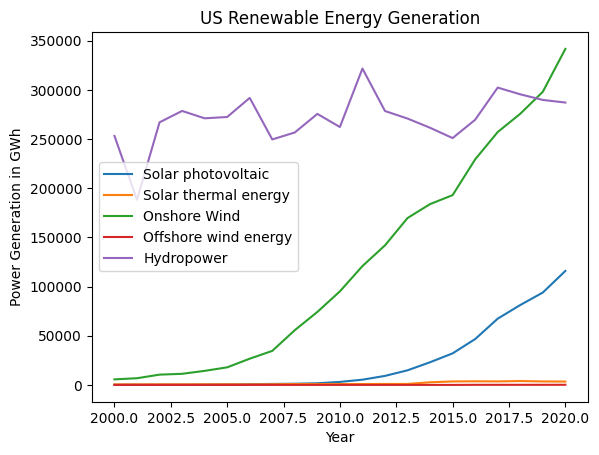

In [222]:
# Plotting renewable energy generation by energy type over time 
plt.plot(usgen_long['Year'],usgen_long['Solar photovoltaic'], label = 'Solar photovoltaic')
plt.plot(usgen_long['Year'],usgen_long['Solar thermal energy'], label = 'Solar thermal energy')
plt.plot(usgen_long['Year'],usgen_long['Onshore wind energy'], label = 'Onshore Wind')
plt.plot(usgen_long['Year'],usgen_long['Offshore wind energy'], label = 'Offshore wind energy')
plt.plot(usgen_long['Year'],usgen_long['Renewable hydropower'], label = 'Hydropower')
plt.title("US Renewable Energy Generation")
plt.xlabel("Year")
plt.ylabel("Power Generation in GWh")
leg = plt.legend(loc='center left')
plt.show()

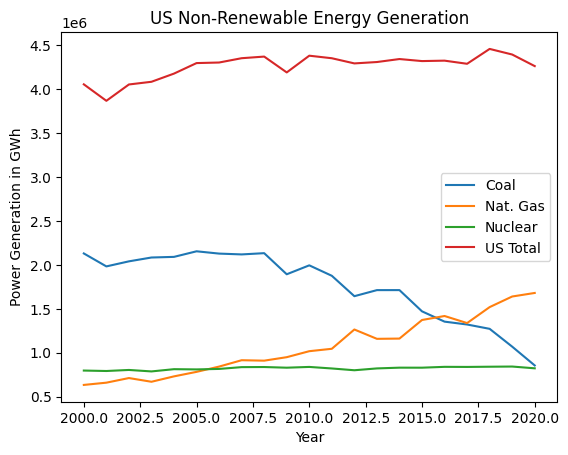

In [223]:
# Plotting electricity generation by energy type over time 
plt.plot(usgen_long['Year'],usgen_long['Coal and peat'], label ='Coal')
plt.plot(usgen_long['Year'],usgen_long['Natural gas'], label ='Nat. Gas')
plt.plot(usgen_long['Year'],usgen_long['Nuclear'], label ='Nuclear')
plt.plot(usgen_long['Year'],usgen_long['Total Energy Generation'], label ='US Total')
plt.xlabel("Year")
plt.ylabel("Power Generation in GWh")
plt.title("US Non-Renewable Energy Generation")
leg = plt.legend(loc='center right')
plt.show()

<ipython-input-224-932e1818395f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newpie = piechart.append(other, ignore_index = True)    # append other category to top 6 dataframe


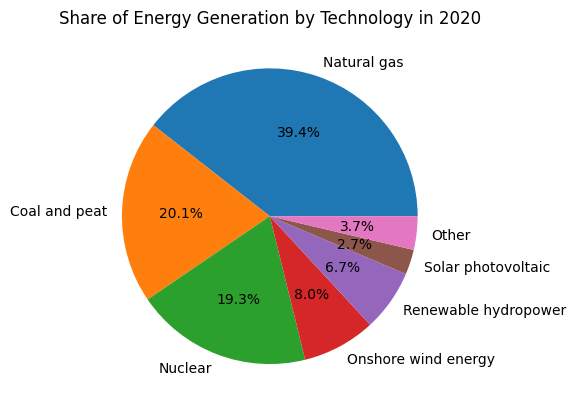

In [224]:
# Pie Chart of top 6 energy sources in 2020 and 'other' category
piechart = usgen_wide.iloc[[15,13,17,2,4,0], :].reset_index()   # create dataframe of top 6 sources by row index
other = {'Technology':'Other', '2020': 156268}    # create a dictionary of sum of other sources
newpie = piechart.append(other, ignore_index = True)    # append other category to top 6 dataframe
plt.pie(newpie["2020"], labels = newpie["Technology"], autopct='%1.1f%%',)    # create pie chart of top 6 sources and all others in 'other' category
plt.title("Share of Energy Generation by Technology in 2020")
plt.show()

In [225]:
# Top energy generation amounts by type (2020)
sorted = usgen_wide.sort_values(by= '2020', ascending=False) # Sort 2020 column descending

In [226]:
# Percent change calculations for certain time periods
usgen_wide['2000-2020 % Change'] = ((usgen_wide['2020'] - usgen_wide['2000'])/usgen_wide['2000']) * 100   # percent increase 2000-2020
usgen_wide['2010-2020 % Change'] = ((usgen_wide['2020'] - usgen_wide['2010'])/usgen_wide['2010']) * 100   # percent increase 2010-2020
usgen_wide['2010-2020 Value change'] = (usgen_wide['2020'] - usgen_wide['2010'])    # value increase 2010-2020
usgen_wide['2019-2020 % Change'] = ((usgen_wide['2020'] - usgen_wide['2019'])/usgen_wide['2019']) * 100   # percent increase 2019-2020
# usgen_wide

In [227]:
# Subset to make chart of top energy sources by percent change
top_change = usgen_wide.iloc[[15,13,17,2,4,0,19], [0,23,24,25]].reset_index()   # create dataframe with rows highest growth energy and columns of percent changes
sorted_top_change = top_change.sort_values(by='2019-2020 % Change', ascending=False)    # sort the dataframe by the last column
# sorted_top_change

In [228]:
# Calculate percent change in top energy sources over time
perchange = pd.DataFrame()    # empty dataframe for percent change values
perchange['Year'] = usgen_long ['Year']   # add year column to new dataframe
perchange['persolar'] = usgen_long ['Solar photovoltaic'].pct_change()    # % change and add to new dataframe
# perchange['persolartotal'] = usgen_long ['Solar Percent of Total'].pct_change()
perchange['perwind'] = usgen_long ['Onshore wind energy'].pct_change()
perchange['pernatgas'] = usgen_long ['Natural gas'].pct_change()
perchange['percoal'] = usgen_long ['Coal and peat'].pct_change()
perchange['pertotal'] = usgen_long ['Total Energy Generation'].pct_change()
perchange = perchange[perchange['Year'] > 2009]    # Subset for 2010-2020 to remove NaN in 2009
# perchange

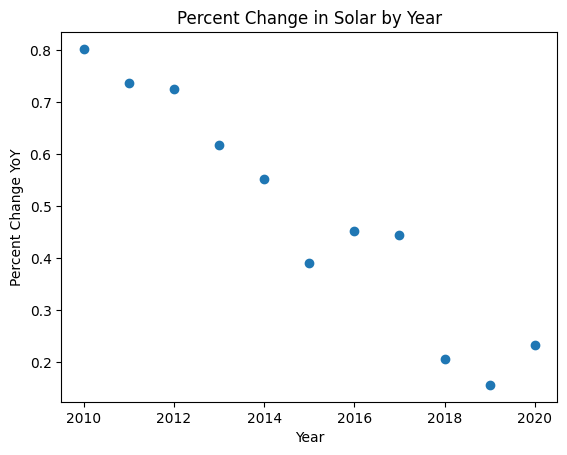

In [229]:
# Plot percent change in solar over time
plt.scatter(perchange['Year'], perchange['persolar'])
plt.xlabel("Year")
plt.ylabel("Percent Change YoY")
plt.title("Percent Change in Solar by Year")
plt.show()

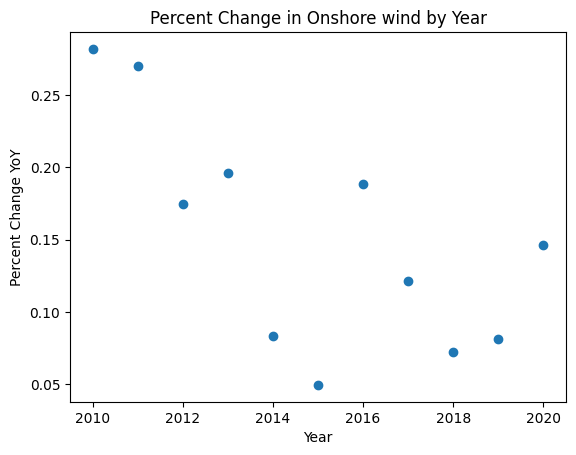

In [230]:
# Plot percent change in onshore wind over time
plt.scatter(perchange['Year'], perchange['perwind'])
plt.xlabel("Year")
plt.ylabel("Percent Change YoY")
plt.title("Percent Change in Onshore wind by Year")
plt.show()

In [231]:
# Correlation between percent change in solar and wind
stats.pearsonr(perchange['persolar'],perchange['perwind'])

PearsonRResult(statistic=0.7581669919243131, pvalue=0.006849801130736936)

In [232]:
# Solar photovoltaic share of total
# solar_share 
usgen_long['Solar Percent of Total'] = (usgen_long['Solar photovoltaic']/usgen_long['Total Energy Generation'])*100
# wind_share 
usgen_long['Wind Percent of Total'] = (usgen_long['Onshore wind energy']/usgen_long['Total Energy Generation'])*100
# solar_share

In [233]:
# Making a column of differences in solar photovoltaic generation to explore
solar_cost_long['Solar_diff'] = solar_cost_long['Solar photovoltaic'].diff()
solar_cost_long['solarpercent'] = solar_cost_long['Solar photovoltaic'].pct_change()
solar_cost_long['avgcostpercent'] = solar_cost_long['Average Cost'].pct_change()
# solar_cost_long

In [234]:
# Correlation between average solar installation cost and total energy generated from solar photovoltaic
stats.pearsonr(solar_cost_long['Solar photovoltaic'], solar_cost_long['Average Cost'])

PearsonRResult(statistic=-0.7911417263768761, pvalue=0.0037287096892659453)

In [235]:
# Correlation between value change YoY in solar photovoltaic and average cost to get correlation (not used in report)
# scl = solar_cost_long[solar_cost_long['Year']>2011]
# stats.pearsonr(scl['Solar_diff'], scl['Average Cost'])


In [236]:
# Correlation between average cost and percent change in solar 
solar_model = solar_cost_long[solar_cost_long['Year'] > 2011]         # Subset to exlude 2010 for NaN in Solar_diff
stats.pearsonr(solar_model['Average Cost'], solar_model['solarpercent'])

PearsonRResult(statistic=0.9146638493300998, pvalue=0.0005494265333164557)

**Models:**

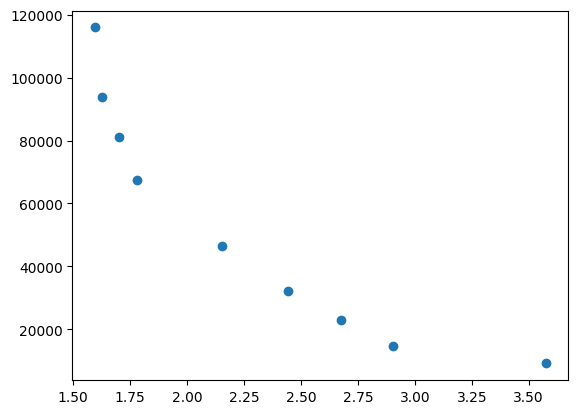

In [237]:
# MODEL 1 Plot of solar generation and average cost
solar_model = solar_cost_long[solar_cost_long['Year'] > 2011]         # Subset to exlude 2010 for NaN in Solar_diff
plt.scatter(solar_model['Average Cost'], solar_model['Solar photovoltaic'])   # Plot solar difference and average cost
plt.show()

<ipython-input-238-73ff6051177f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_model['logaveragecost'] = np.log2(solar_model['Average Cost'])    # log average cost


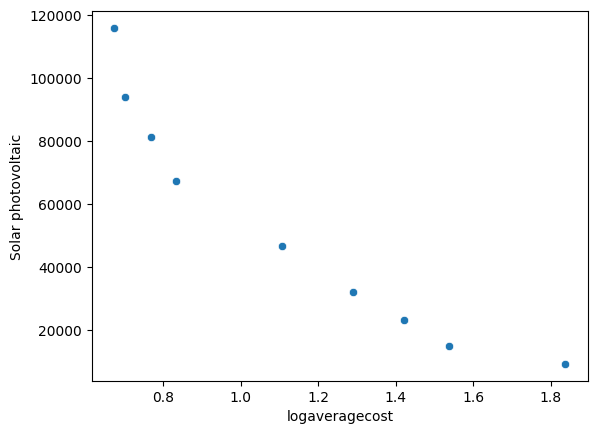

In [238]:
# MODEL 1 Fit the model with a log transformation
solar_model['logaveragecost'] = np.log2(solar_model['Average Cost'])    # log average cost
sns.scatterplot(x= solar_model['logaveragecost'], y= solar_model['Solar photovoltaic'])   # plot
plt.show()

In [239]:
# MODEL 1 Log Model of average cost and solar generation
X1 = solar_model.loc[:,['logaveragecost']]    #Create a dataframe of the predictor
X1 = sm.add_constant(X1)    # add constant
y = solar_model['Solar photovoltaic']   # isolate outcome variable as series
modfit1 = sm.OLS(y,X1).fit()    # fit the model
modfit1.summary()   # display results

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Solar photovoltaic   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     62.06
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           0.000101
Time:                        02:04:17   Log-Likelihood:                -96.780
No. Observations:                   9   AIC:                             197.6
Df Residuals:                       7   BIC:                             198.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.506e+05    1.3e+04     11.575      0.000     1.2e+05    1.81e+05
logaveragecost -8.573e+04   1.09e+04     -7.878      0.000   -1.11e+05      -6e+04
==============================================================================
Omnibus:                        3.061   Durbin-Watson:                   0.799
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                1.574
Skew:                           1.002   Prob(JB):                        0.455
Kurtosis:                       2.575   Cond. No.                         6.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [240]:
# Predict values
xnew = [[1, 0.8]] # create array of test values
xnew= sm.add_constant(xnew)   # add constant to array
modfit1.predict(xnew)   # run model to make prediction

array([82059.68894168])

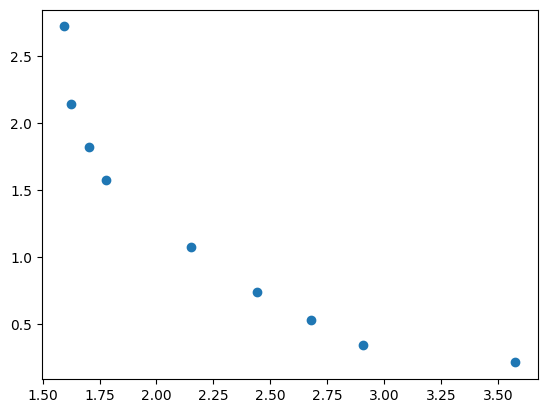

In [241]:
# MODEL 2 Share of solar of total energy generated compared to average cost
pertotal = usgen_long[usgen_long['Year']> 2011]   # subset to remove outlier of $5
plt.scatter(solar_model['Average Cost'], pertotal['Solar Percent of Total'])    # plot
plt.show()


<ipython-input-242-36aef3a391b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_model['logaveragecost'] = np.log2(solar_model['Average Cost'])    # log of average cost


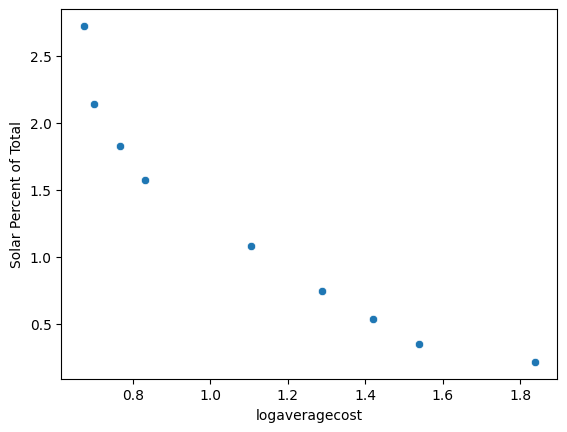

In [242]:
# MODEL 2 Fit the model with a log transformation
solar_model['logaveragecost'] = np.log2(solar_model['Average Cost'])    # log of average cost
sns.scatterplot(x= solar_model['logaveragecost'], y= pertotal['Solar Percent of Total'])    # plot
plt.show()

In [243]:
# MODEL 2 Log Model Share of total
X2 = solar_model.loc[:,['logaveragecost']]     #Create a dataframe of the predictor
X2 = sm.add_constant(X2)    # add constant
y = pertotal['Solar Percent of Total']    # isolate the outcome variable as a series
modfit2 = sm.OLS(y,X2).fit()    # fit the model
modfit2.summary()   # display results

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Solar Percent of Total   R-squared:                       0.891
Model:                                OLS   Adj. R-squared:                  0.875
Method:                     Least Squares   F-statistic:                     57.20
Date:                    Tue, 25 Apr 2023   Prob (F-statistic):           0.000130
Time:                            02:04:24   Log-Likelihood:                -1.0325
No. Observations:                       9   AIC:                             6.065
Df Residuals:                           7   BIC:                             6.459
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.4695      0.312     11.120      0.000       2.732       4.207
logaveragecost    -1.9730      0.261     -7.563      0.000      -2.590      -1.356
==============================================================================
Omnibus:                        4.436   Durbin-Watson:                   0.826
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                2.032
Skew:                           1.162   Prob(JB):                        0.362
Kurtosis:                       2.873   Cond. No.                         6.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
# Predict values
xnew = [1,1.4] # create array of test values
xnew= sm.add_constant(xnew)   # add constant to array
modfit2.predict(xnew)   # run model to make prediction

array([1.49640746, 0.70718966])

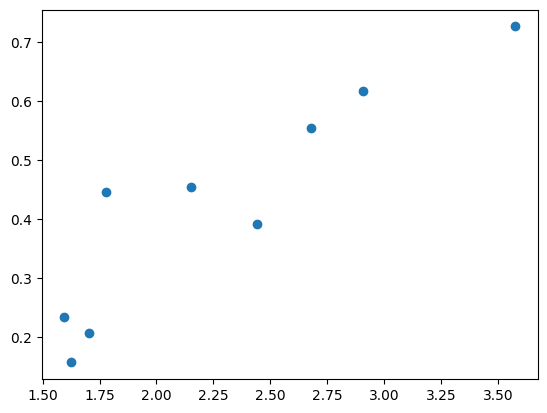

In [245]:
# MODEL 3 Model for percent change in solar compared to average cost
solar_model = solar_cost_long[solar_cost_long['Year'] > 2011]         # Subset to exlude 2010 for NaN in Solar_diff (and removes outlier 5 cost)
plt.scatter(solar_model['Average Cost'], solar_model['solarpercent'])   # Plot solar difference and average cost
plt.show()

In [246]:
# MODEL 3 Linear model of percent difference in solar vs average cost
X3 = solar_model.loc[:,['Average Cost']]     #Create a dataframe of the predictor
X3 = sm.add_constant(X3)    # add constant
y = solar_model['solarpercent']   # isolate outcome variable as a series
modfit3 = sm.OLS(y,X3).fit()    # fit the model
modfit3.summary()   # display result

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           solarpercent   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     35.84
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           0.000549
Time:                        02:04:30   Log-Likelihood:                 10.640
No. Observations:                   9   AIC:                            -17.28
Df Residuals:                       7   BIC:                            -16.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1710      0.103     -1.666      0.140      -0.414       0.072
Average Cost     0.2601      0.043      5.987      0.001       0.157       0.363
==============================================================================
Omnibus:                        1.369   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.504   Jarque-Bera (JB):                0.668
Skew:                           0.633   Prob(JB):                        0.716
Kurtosis:                       2.576   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [247]:
# Predict values
xnew = [1, .59] # create array of test values ($0.59 creates an outcome of 0% growth)
xnew= sm.add_constant(xnew)   # add constant to array
modfit3.predict(xnew)   # run model to make prediction

array([ 0.08909486, -0.0175419 ])

**SCRATCH CODE: The code below this line was my experimentation with models and is not included in the analysis**

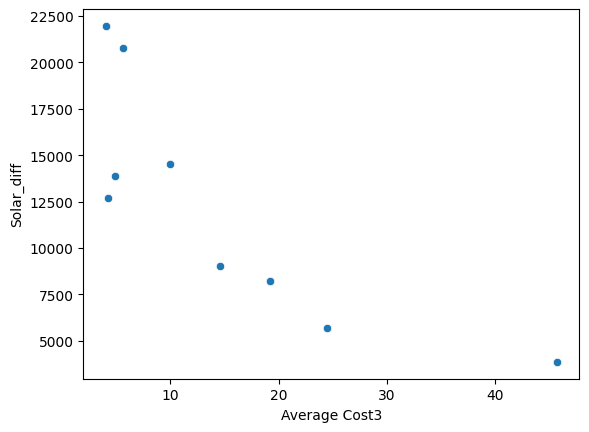

In [ ]:
# 3rd order polynomial Model how much additional generation is created each year
X = solar_model.loc[:,['Average Cost']]     #Create a dataframe of the predictor
X['Average Cost2'] = X['Average Cost']**2   #Create the 'squared' term
X['Average Cost3'] = X['Average Cost']**3   #Create the 'cubed' term
#Visually check the relationship between the cubed term and the outcome
sns.scatterplot(x = X['Average Cost3'], y = solar_model['Solar_diff'])
plt.show()

In [ ]:
# 3rd order polynomial model summary
X = sm.add_constant(X)
y = solar_model['Solar_diff']
modfit4 = sm.OLS(y,X).fit()
modfit4.summary()

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Solar_diff   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     5.637
Date:                Sun, 23 Apr 2023   Prob (F-statistic):             0.0463
Time:                        02:59:25   Log-Likelihood:                -84.290
No. Observations:                   9   AIC:                             176.6
Df Residuals:                       5   BIC:                             177.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.985e+04   1.23e+05     -0.324      0.759   -3.57e+05    2.77e+05
Average Cost   8.542e+04   1.56e+05      0.549      0.606   -3.14e+05    4.85e+05
Average Cost2 -3.957e+04   6.26e+04     -0.632      0.555      -2e+05    1.21e+05
Average Cost3  5342.9790   8064.616      0.663      0.537   -1.54e+04    2.61e+04
==============================================================================
Omnibus:                        0.013   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.239
Skew:                           0.014   Prob(JB):                        0.887
Kurtosis:                       2.202   Cond. No.                     3.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

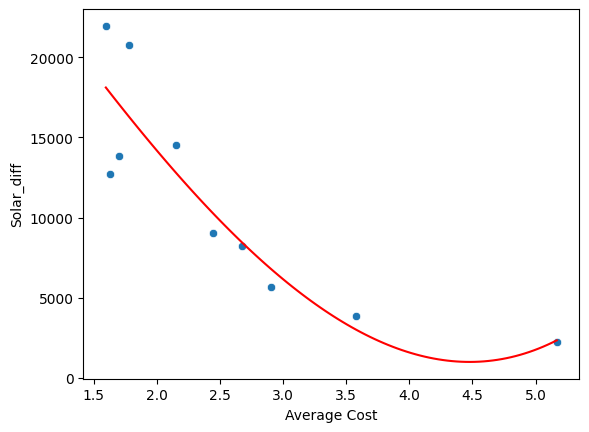

In [ ]:
# check how well the 3rd order polynomial model fits
mod4xpoints = np.linspace(solar_model['Average Cost'].min(), solar_model['Average Cost'].max(), 100)
  #This creates 100 evenly spaced points, from the low end to the high end of the 'percasian' spectrum
    #This will serve as the "X" of our predictor; we still need X^2 and X^3
mod4xframe = pd.DataFrame(mod4xpoints) #Turn it into a dataframe, since .predict() will require one eventually
mod4xframe = pd.concat([mod4xframe, mod4xframe**2, mod4xframe**3], axis = 1) #Now create the X^2 and X^3 terms, and stick them all together
mod4xframe = sm.add_constant(mod4xframe) #Add a constant (for the prediction)
mod4ypoints = modfit.predict(mod4xframe) #Make the predictions using the 
sns.scatterplot(x = solar_model['Average Cost'], y = solar_model['Solar_diff']) #Plot the actual data
sns.lineplot(x = mod4xpoints, y = mod4ypoints, color = 'red') #Plot the predicted points
plt.show()

In [ ]:
# predictions
Xnew = [[1,1,1,1],[1,1,1,1]]
Xnew = sm.add_constant(Xnew)
modfit2.predict(Xnew)

array([11342.11167251, 11342.11167251])